#### SOLUTION

### Study session 10 - more bioinformatics: pandas, visualization and OOP 

#### BIOINF 575 - Fall 2023




___

#### <font color = "red">Exercise</font>

#### Implement the following class: 

The `Patient` class should have the following attributes as read-only properties (read-only = cannot be set through assignment outside of the class): `name`, `age`, `height`, `weight`, `BMI`, `status` (Inpatient/Outpatient), `diseases` (list of str), `disease_no`.    
It also should have 4 methods: `add_disease`, `update_weight`, `update_status`, `backup` (creates a patient with the same name, age, height, weight, diseases and status) 

BMI formula: 703 x weight (lbs) / [height (in)]2        
https://www.cdc.gov/healthyweight/assessing/bmi/adult_bmi/index.html




In [1]:
# Write your solution here


In [2]:
# implement the __init__ method 
# in __init__ we create custom attributes, to hide them we use __ :  name, age, ....
# implement __str__ and __repr__ methods to be able to display the object 

class Patient:
    """
    Stores the information for a patient
    Attributes:
        name(str): patient name (first last)
        age(int): patient age in years 
        height(float): patient height in inches 
        weight(float): patient weight in lbs 
        BMI: patient body mass index computed from height and weight with the formula 703 x weight (lbs) / [height (in)]2
        status(str): Patient status: one of Inpatient or Outpatient
        diseases (list of str): list of diseases the patient has 
        disease_no(int): number of diseases the patient has
    Methods:
        add_disease(str): adds an element to the disease list - updates number_of_diseases
        update_weight(float): changes the weight attribute to the given value 
        update_status(): changes the status (Inpatient -> Outpatient or Outpatient -> Inpatient) 
        backup(): creates a patient with the same name, age, height, weight, diseases and status
    """
    
    def __init__(self, name = None, age = None, height = None, weight = None, status = "Outpatient", diseases = None):
        self.__name = name
        self.__age = age 
        self.__height = height
        self.__weight = weight 
        self.__BMI = None
        if self.__height and self.__weight:
            self.__BMI = 703 * self.__weight / (self.__height)**2
        self.__status = status
        self.__diseases = diseases
        if not self.__diseases:
            self.__diseases = []
        self.__disease_no = len(self.__diseases)
    
    def __str__(self):
        return f'Patient({self.__name}, {self.__age}, {self.__height}, {self.__weight}, {self.__status}, {self.__diseases})'
    
    def __repr__(self):
        return f'Patient({self.__name}, {self.__age}, {self.__height}, {self.__weight}, {self.__status}, {self.__diseases})'
        

    @property
    def name(self):
        return self.__name
    
    @property
    def age(self):
        return self.__age
    
    @property
    def status(self):
        return self.__status

    @property
    def weight(self):
        return self.__weight 

    @property
    def height(self):
        return self.__height 
    
    @property
    def BMI(self):
        return self.__BMI
    
    @property
    def diseases(self):
        return self.__diseases 
    
    @property
    def disease_no(self):
        return self.__disease_no 
    
    
    def add_disease(self, disease_name):
        self.__diseases.append(disease_name) 
        self.__disease_no = len(self.__diseases)
    
    def update_weight(self, new_weight):
        self.__weight = new_weight
        if self.__height and self.__weight:
            self.__BMI = 703 * self.__weight / (self.__height)**2
    
    def update_status(self):
        if self.__status == "Inpatient":
            self.__status = "Outpatient"
        else:
            self.__status = "Inpatient"    
    
    def backup(self):
        return Patient(self.__name, self.__age, self.__height, self.__weight, self.__status, self.__diseases)
    

In [3]:
# test the class

p = Patient()
print(p.name)
print(p.weight)
print(p.disease_no)
print(p.diseases)
print(p.status)


None
None
0
[]
Outpatient


In [4]:
p = Patient("Test Patient", 40, 72, 170)
print(p.name)
print(p.weight)
print(p.BMI)
print(p.disease_no)
print(p.status)

Test Patient
170
23.053626543209877
0
Outpatient


In [5]:
703 * 170/(72)**2

23.053626543209877

In [6]:
p

Patient(Test Patient, 40, 72, 170, Outpatient, [])

In [7]:
p.update_status()
p

Patient(Test Patient, 40, 72, 170, Inpatient, [])

In [8]:
p.update_weight(180)
p.BMI

24.40972222222222

In [9]:
p.add_disease("Cold")
print(p.diseases)
print(p.disease_no)

['Cold']
1


In [10]:
# if we update only the disease list we have inconsistent data
p.diseases.append("Headache")
print(p.diseases)
print(p.disease_no)

['Cold', 'Headache']
1


___

#### <font color = "red">Exercise</font>

#### Implement the following classes: 

The `Gene` class should have an id (`gid`), `symbol` and `description`.   
The `GO_term` class should have a GO term id (`gtid`) and `name`.     
The `Gene_goTerm` class should have the `gene_id` and the `GO_term_id`. 
* <b>Create a list of genes, a list of GO terms, and a list of gene to GO term elements from the file `genes_info1.txt`   
* <b>Create pandas data frames from the above lists (look into the vars function, and \_\_dict\_\_ attribute for an object)


In [11]:
# Write your solution here




#### Implement the following classes: Gene, GOTerm, GENEGOTerm

In [12]:
# implement the Gene class
# implement the __init__ method 
# in __init__ we create custom attributes:  gid, symbol and description
# implement __str__ and __repr__ methods to be able to display the object 
# implement the __eq__ method to be able to chech equality between Gnee objects

class Gene:
    def __init__(self,  gid, sym, desc): 
        # checks can be done to make sure the data is not missing and 
        # each parameter should ahve the correct type
        self.gid = gid
        self.symbol = sym
        self.description = desc
        
    def __str__(self):
        return f"Gene({self.gid},'{self.symbol}','{self.description}')"
    
    def __repr__(self):
        return f"Gene({self.gid},'{self.symbol}','{self.description}')"
    
    def __eq__(self, g):
        return self.gid == g.gid and self.symbol == g.symbol and self.description == g.description
    
    

In [13]:
# test 

g = Gene(2, "GSYM", "Gene for testing")
g

Gene(2,'GSYM','Gene for testing')

In [14]:
# implement the GOTerm class
# implement the __init__ method 
# in __init__ we create custom attributes:  gid, symbol and description
# implement __str__ and __repr__ methods to be able to display the object 

class GOTerm:
    def __init__(self,  gtid, name): 
        # checks can be done to make sure the data is not missing and 
        # each parameter should ahve the correct type
        self.gtid = gtid
        self.name = name
        
    def __str__(self):
        return f"GOTerm({self.gtid},'{self.name}')"
    
    def __repr__(self):
        return f"GOTerm({self.gtid},'{self.name}')"
        
   

In [15]:
# test

gt = GOTerm(5, "Cell adhesion")
gt

GOTerm(5,'Cell adhesion')

In [16]:
# implement the GeneGOTerm class
# implement the __init__ method 
# in __init__ we create custom attributes:  gid, symbol and description
# implement __str__ and __repr__ methods to be able to display the object 

class GeneGOTerm:
    def __init__(self,  gid, gtid): 
        # checks can be done to make sure the data is not missing and 
        # each parameter should ahve the correct type
        self.gene_id = gid
        self.GO_term_id = gtid
        
    def __str__(self):
        return f"GeneGOTerm({self.gene_id},'{self.GO_term_id}')"
    
    def __repr__(self):
        return f"GeneGOTerm({self.gene_id},'{self.GO_term_id}')"
        
   

In [17]:
# test 
ggt = GeneGOTerm(2, 5)
ggt

GeneGOTerm(2,'5')

#### Create a list of genes, a list of GO terms, and a list of gene to GO term elements from the file `genes_info1.txt`

In [18]:
# initialize variables for the three lists
genes_lst = []
go_terms_lst = []
genes_go_terms_lst = []
# a list with the go terms description of 
# the go terms we already created 
# so we don't have duplicates
terms_lst = []

# read lines from the file one by one
file_name = "genes_info1.txt"
with open(file_name) as gene_file:
    header_line = gene_file.readline()
    for line in gene_file:
        line_list = line.strip().split("\t")
        # Create a Gene object and add it to the list
        # *line_list[:3] will take the first three values from the list 
        # and pass them as values for the first three parameters of the function
        # gid, sym and desc
        genes_lst.append(Gene(*line_list[:3]))
        
        # The last column in the file contains the GO terms separated by ";" 
        # that is the last element in the line_list for any given line
        for go_term in line_list[-1].strip().split(";"):
            if (go_term not in terms_lst):
                terms_lst.append(go_term)
                go_terms_lst.append(GOTerm(len(terms_lst), go_term))
            gene_id = line_list[0]
            go_term_id = terms_lst.index(go_term) + 1
            genes_go_terms_lst.append(GeneGOTerm(gene_id, go_term_id))


In [19]:
genes_lst

[Gene(672,'BRCA1','BRCA1 DNA repair associated'),
 Gene(675,'BRCA2','BRCA2 DNA repair associated'),
 Gene(7157,'TP53','tumor protein p53'),
 Gene(10296,'MAEA','macrophage erythroblast attacher, E3 ubiquitin ligase'),
 Gene(7040,'TGFB1','transforming growth factor beta 1'),
 Gene(64926,'RASAL3','RAS protein activator like 3')]

In [20]:
go_terms_lst

[GOTerm(1,'intrinsic apoptotic signaling pathway in response to DNA damage'),
 GOTerm(2,'transcription cis-regulatory region binding'),
 GOTerm(3,'transcription coactivator activity'),
 GOTerm(4,'ubiquitin-protein transferase activity'),
 GOTerm(5,'histone acetyltransferase activity'),
 GOTerm(6,'protease binding'),
 GOTerm(7,'single-stranded DNA binding'),
 GOTerm(8,'protein binding'),
 GOTerm(9,'negative regulation of transcription, DNA-templated'),
 GOTerm(10,'positive regulation of transcription by RNA polymerase II'),
 GOTerm(11,'promoter-specific chromatin binding'),
 GOTerm(12,'circadian behavior'),
 GOTerm(13,'cell adhesion')]

In [21]:
genes_go_terms_lst

[GeneGOTerm(672,'1'),
 GeneGOTerm(672,'2'),
 GeneGOTerm(672,'3'),
 GeneGOTerm(672,'4'),
 GeneGOTerm(675,'5'),
 GeneGOTerm(675,'6'),
 GeneGOTerm(675,'7'),
 GeneGOTerm(675,'8'),
 GeneGOTerm(7157,'9'),
 GeneGOTerm(7157,'10'),
 GeneGOTerm(7157,'11'),
 GeneGOTerm(7157,'12'),
 GeneGOTerm(10296,'13'),
 GeneGOTerm(10296,'8'),
 GeneGOTerm(10296,'11'),
 GeneGOTerm(7040,'13'),
 GeneGOTerm(7040,'8'),
 GeneGOTerm(64926,'13'),
 GeneGOTerm(64926,'8'),
 GeneGOTerm(64926,'6')]

#### Create pandas data frames from the above lists 
##### look into the `vars` function, and `__dict__` attribute for an object

In [22]:
# To create a dataframe from an object we can use the __dict__ attribute or the vars() function

print(g.__dict__)

{'gid': 2, 'symbol': 'GSYM', 'description': 'Gene for testing'}


In [23]:
help(vars)

Help on built-in function vars in module builtins:

vars(...)
    vars([object]) -> dictionary
    
    Without arguments, equivalent to locals().
    With an argument, equivalent to object.__dict__.



In [24]:
# we can create a dataframe from a dictionary if we have the columns as keys
# help(pd.DataFrame.from_dict)

# we can create a dataframe from a list of dictionaries 
# if we have each dictionary with the same key
# each dictionary in the list is a row
# help(pd.DataFrame.from_records)

import numpy as np
import pandas as pd

pd.DataFrame.from_records([vars(g)])

,gid,symbol,description
0,2,GSYM,Gene for testing


In [25]:
# let's create the list of dictionaries

[vars(gene) for gene in genes_lst]

[{'gid': '672',
  'symbol': 'BRCA1',
  'description': 'BRCA1 DNA repair associated'},
 {'gid': '675',
  'symbol': 'BRCA2',
  'description': 'BRCA2 DNA repair associated'},
 {'gid': '7157', 'symbol': 'TP53', 'description': 'tumor protein p53'},
 {'gid': '10296',
  'symbol': 'MAEA',
  'description': 'macrophage erythroblast attacher, E3 ubiquitin ligase'},
 {'gid': '7040',
  'symbol': 'TGFB1',
  'description': 'transforming growth factor beta 1'},
 {'gid': '64926',
  'symbol': 'RASAL3',
  'description': 'RAS protein activator like 3'}]

In [26]:
# let's create the dataframe

df_genes = pd.DataFrame.from_records([vars(gene) for gene in genes_lst])
df_genes

,gid,symbol,description
0,672,BRCA1,BRCA1 DNA repair associated
1,675,BRCA2,BRCA2 DNA repair associated
2,7157,TP53,tumor protein p53
3,10296,MAEA,"macrophage erythroblast attacher, E3 ubiquitin..."
4,7040,TGFB1,transforming growth factor beta 1
5,64926,RASAL3,RAS protein activator like 3


In [27]:
df_go_terms = pd.DataFrame.from_records([vars(go_term) for go_term in go_terms_lst])
df_go_terms

,gtid,name
0,1,intrinsic apoptotic signaling pathway in respo...
1,2,transcription cis-regulatory region binding
2,3,transcription coactivator activity
3,4,ubiquitin-protein transferase activity
4,5,histone acetyltransferase activity
5,6,protease binding
6,7,single-stranded DNA binding
7,8,protein binding
8,9,"negative regulation of transcription, DNA-temp..."
9,10,positive regulation of transcription by RNA po...


In [28]:
df_genes_go_terms = pd.DataFrame.from_records([vars(gene_go_term) for gene_go_term in genes_go_terms_lst])
df_genes_go_terms

,gene_id,GO_term_id
0,672,1
1,672,2
2,672,3
3,672,4
4,675,5
5,675,6
6,675,7
7,675,8
8,7157,9
9,7157,10


___

#### <font color = "red">Exercise</font>

#### Create a GO term gene dataframe

Create a dataframe with two columns: a GO_term column that has the GO term name, and a genes column that for each GO term has a set of genes (gene symbols) associated with the GO term separated by ",".



In [29]:
# Write your solution here




In [30]:
# help(df_genes.merge)

In [31]:
# put the dataframes together
# link genes and gene_go_term interactions by gene_id

merged_data_ggt = df_genes.merge(df_genes_go_terms, left_on = "gid", right_on = "gene_id", how = "inner")
merged_data_ggt.head()

,gid,symbol,description,gene_id,GO_term_id
0,672,BRCA1,BRCA1 DNA repair associated,672,1
1,672,BRCA1,BRCA1 DNA repair associated,672,2
2,672,BRCA1,BRCA1 DNA repair associated,672,3
3,672,BRCA1,BRCA1 DNA repair associated,672,4
4,675,BRCA2,BRCA2 DNA repair associated,675,5


In [32]:
# link the merged dataframe with the go_terms by go_term_id

merged_data = merged_data_ggt.merge(df_go_terms, left_on = "GO_term_id", right_on = "gtid", how = "inner")
merged_data.head()


,gid,symbol,description,gene_id,GO_term_id,gtid,name
0,672,BRCA1,BRCA1 DNA repair associated,672,1,1,intrinsic apoptotic signaling pathway in respo...
1,672,BRCA1,BRCA1 DNA repair associated,672,2,2,transcription cis-regulatory region binding
2,672,BRCA1,BRCA1 DNA repair associated,672,3,3,transcription coactivator activity
3,672,BRCA1,BRCA1 DNA repair associated,672,4,4,ubiquitin-protein transferase activity
4,675,BRCA2,BRCA2 DNA repair associated,675,5,5,histone acetyltransferase activity


In [33]:
# another option - merge using the method join, similar to the join between tables in SQL

# help(df_genes.join)


In [34]:
# link genes and gene_go_term interactions by gene_id
merged_data_ggt = df_genes_go_terms.join(df_genes.set_index("gid"), 
                                         on = ["gene_id"], how = "inner")
print("Join genes and gene_go_term interactions by gene_id:\n")
print(merged_data_ggt.head())

# link the merged dataframe with the go_terms by go_term_id
merged_data = merged_data_ggt.join(df_go_terms.set_index("gtid"), 
                                         on = ["GO_term_id"], how = "inner")
print("Join the resulting dataframe with the go_terms by go_term_id:\n")
merged_data.head()




Join genes and gene_go_term interactions by gene_id:

  gene_id  GO_term_id symbol                  description
0     672           1  BRCA1  BRCA1 DNA repair associated
1     672           2  BRCA1  BRCA1 DNA repair associated
2     672           3  BRCA1  BRCA1 DNA repair associated
3     672           4  BRCA1  BRCA1 DNA repair associated
4     675           5  BRCA2  BRCA2 DNA repair associated
Join the resulting dataframe with the go_terms by go_term_id:



,gene_id,GO_term_id,symbol,description,name
0,672,1,BRCA1,BRCA1 DNA repair associated,intrinsic apoptotic signaling pathway in respo...
1,672,2,BRCA1,BRCA1 DNA repair associated,transcription cis-regulatory region binding
2,672,3,BRCA1,BRCA1 DNA repair associated,transcription coactivator activity
3,672,4,BRCA1,BRCA1 DNA repair associated,ubiquitin-protein transferase activity
4,675,5,BRCA2,BRCA2 DNA repair associated,histone acetyltransferase activity


In [35]:
# select only the go_term name and gene symbol form the merged dataframe

df_sel = merged_data.loc[:,("name","symbol")]
df_sel.head()

,name,symbol
0,intrinsic apoptotic signaling pathway in respo...,BRCA1
1,transcription cis-regulatory region binding,BRCA1
2,transcription coactivator activity,BRCA1
3,ubiquitin-protein transferase activity,BRCA1
4,histone acetyltransferase activity,BRCA2


In [36]:
type(df_sel)

pandas.core.frame.DataFrame

In [37]:
df_sel.groupby("name").head()

,name,symbol
0,intrinsic apoptotic signaling pathway in respo...,BRCA1
1,transcription cis-regulatory region binding,BRCA1
2,transcription coactivator activity,BRCA1
3,ubiquitin-protein transferase activity,BRCA1
4,histone acetyltransferase activity,BRCA2
5,protease binding,BRCA2
19,protease binding,RASAL3
6,single-stranded DNA binding,BRCA2
7,protein binding,BRCA2
13,protein binding,MAEA


In [38]:
df_sel.groupby("name")["symbol"].head()

0      BRCA1
1      BRCA1
2      BRCA1
3      BRCA1
4      BRCA2
5      BRCA2
19    RASAL3
6      BRCA2
7      BRCA2
13      MAEA
16     TGFB1
18    RASAL3
8       TP53
9       TP53
10      TP53
14      MAEA
11      TP53
12      MAEA
15     TGFB1
17    RASAL3
Name: symbol, dtype: object

In [39]:
# Create a dataframe with two columns: a GO_term column that has the GO term name, 
#and a genes column that for each GO term has a set of genes (gene symbols) 
# associated with the GO term separated by ","

# on the grouped dataframe we apply the set function to the symbol column to apply 
# the set function to all the sene symbols that are in a group with the same GO term name

df_sel.groupby("name")["symbol"].apply(set)

name
cell adhesion                                                             {MAEA, TGFB1, RASAL3}
circadian behavior                                                                       {TP53}
histone acetyltransferase activity                                                      {BRCA2}
intrinsic apoptotic signaling pathway in response to DNA damage                         {BRCA1}
negative regulation of transcription, DNA-templated                                      {TP53}
positive regulation of transcription by RNA polymerase II                                {TP53}
promoter-specific chromatin binding                                                {MAEA, TP53}
protease binding                                                                {BRCA2, RASAL3}
protein binding                                                    {MAEA, TGFB1, BRCA2, RASAL3}
single-stranded DNA binding                                                             {BRCA2}
transcription cis-regulatory region

___

#### <font color = "red">Exercise</font>

#### Explore gene annotations

Plot a histogram and a barplot and a boxplot for the number of goterms per gene



In [40]:
# Write your solution here


In [41]:
# look at the gene go annotation data 
df_sel

,name,symbol
0,intrinsic apoptotic signaling pathway in respo...,BRCA1
1,transcription cis-regulatory region binding,BRCA1
2,transcription coactivator activity,BRCA1
3,ubiquitin-protein transferase activity,BRCA1
4,histone acetyltransferase activity,BRCA2
5,protease binding,BRCA2
19,protease binding,RASAL3
6,single-stranded DNA binding,BRCA2
7,protein binding,BRCA2
13,protein binding,MAEA


In [42]:
# group by gene symbol
df_sel.groupby("symbol")

In [43]:
pd.DataFrame(df_sel.groupby("symbol"))

,0,1
0,BRCA1,...
1,BRCA2,name symbol 4...
2,MAEA,name symbol...
3,RASAL3,name symbol 19 protease bind...
4,TGFB1,name symbol 16 protein binding...
5,TP53,...


In [44]:
# group by gene symbol and select the name column
df_sel.groupby("symbol")["name"]

In [45]:
pd.Series(df_sel.groupby("symbol")["name"])

0    (BRCA1, [intrinsic apoptotic signaling pathway...
1    (BRCA2, [histone acetyltransferase activity, p...
2    (MAEA, [protein binding, promoter-specific chr...
3    (RASAL3, [protease binding, protein binding, c...
4            (TGFB1, [protein binding, cell adhesion])
5    (TP53, [negative regulation of transcription, ...
dtype: object

In [46]:
# make a tuple of the go terms for each gene
df_sel.groupby("symbol")["name"].apply(tuple)

symbol
BRCA1     (intrinsic apoptotic signaling pathway in resp...
BRCA2     (histone acetyltransferase activity, protease ...
MAEA      (protein binding, promoter-specific chromatin ...
RASAL3    (protease binding, protein binding, cell adhes...
TGFB1                      (protein binding, cell adhesion)
TP53      (negative regulation of transcription, DNA-tem...
Name: name, dtype: object

In [47]:
# count the tuple elements using len
df_sel.groupby("symbol")["name"].apply(tuple)

symbol
BRCA1     (intrinsic apoptotic signaling pathway in resp...
BRCA2     (histone acetyltransferase activity, protease ...
MAEA      (protein binding, promoter-specific chromatin ...
RASAL3    (protease binding, protein binding, cell adhes...
TGFB1                      (protein binding, cell adhesion)
TP53      (negative regulation of transcription, DNA-tem...
Name: name, dtype: object

In [48]:
# putting all steps together
# compute the count - how many go terms are associated with each gene
gene_go_count = df_sel.groupby("symbol")["name"].apply(tuple).apply(len)
gene_go_count

symbol
BRCA1     4
BRCA2     4
MAEA      3
RASAL3    3
TGFB1     2
TP53      4
Name: name, dtype: int64

<AxesSubplot:>

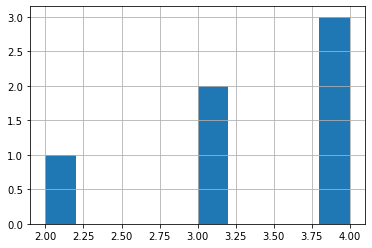

In [49]:
# plot the histogram - see distribution of counts
gene_go_count.hist()

<AxesSubplot:>

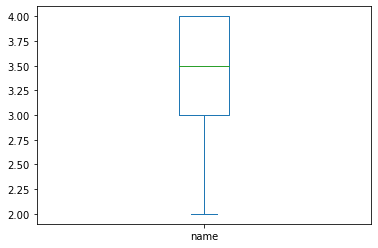

In [50]:
# see the distribution of counts in a boxplot
gene_go_count.plot(kind = "box")

<AxesSubplot:xlabel='symbol'>

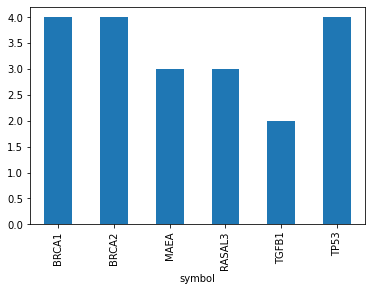

In [51]:
# to see counts for each gene we use a barplot
# we now have the gene symbols on the x axis and 
# the count for each gene on the y axix - bar height

gene_go_count.plot(kind = "bar")

<AxesSubplot:xlabel='symbol'>

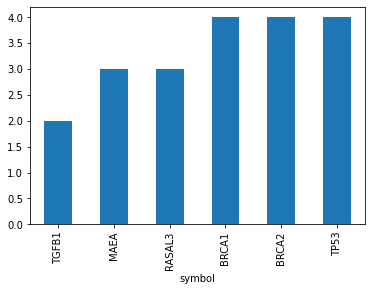

In [52]:
gene_go_count.sort_values().plot(kind = "bar")

___

<b> <font color = "red">Exercise</font></b>

#### Package exploration

Look into the bamnostic package and find out what operating systems it supports, what dependencies it has and find a class it defines.

https://github.com/betteridiot/bamnostic

Look at pandas for similar information.

https://github.com/pandas-dev/pandas


In [53]:
# Write your solution here




To find out how the project will be set up look in `setup.py`:    
https://github.com/betteridiot/bamnostic/blob/master/setup.py

OPERATING SYSTEM:

Classifiers can be used for searching and to specify various package attributes.    
https://packaging.python.org/guides/distributing-packages-using-setuptools/#classifiers     
https://packaging.python.org/guides/distributing-packages-using-setuptools/#python-requires

Although the list of classifiers is often used to declare what Python versions a project supports, this information is only used for searching & browsing projects on PyPI, not for installing projects. To actually restrict what Python versions a project can be installed on, use the python_requires argument.

List of classifiers:      
https://pypi.org/classifiers/

https://pypi.org/search/?q=&o=     
If you look on the left panel at filter by classifier - operating system - you can see all operating systems. available in general.

For <b>bamnostic</b> we have:     
https://github.com/betteridiot/bamnostic/blob/master/setup.py

Operating systems: Unix, Microsoft :: Windows, MacOS
```
        "Operating System :: Unix",
        "Operating System :: Microsoft :: Windows",
        "Operating System :: MacOS",
        "Programming Language :: Python :: 2.7",
        "Programming Language :: Python :: 3",
        "Programming Language :: Python :: 3.0",
        "Programming Language :: Python :: 3.1",
        "Programming Language :: Python :: 3.2",
        "Programming Language :: Python :: 3.3",
        "Programming Language :: Python :: 3.4",
        "Programming Language :: Python :: 3.5",
        "Programming Language :: Python :: 3.6",
        "Programming Language :: Python :: 3.7",
        "Programming Language :: Python :: 3.8",
        
```

DEPENDENCIES: 

`install_requires` should be used to specify what dependencies a project minimally needs to run.    
When the project is installed by pip, this is the specification that is used to install its dependencies.
For more on using “install_requires” see install_requires vs requirements files.
https://packaging.python.org/guides/distributing-packages-using-setuptools/#install-requires
https://packaging.python.org/discussions/install-requires-vs-requirements/#install-requires-vs-requirements-files

https://python-packaging.readthedocs.io/en/latest/dependencies.html      
https://packaging.python.org/guides/distributing-packages-using-setuptools/#python-requires


For <b>bamnostic</b> we have: Dependencies: None        
https://github.com/betteridiot/bamnostic/blob/master/setup.py    


```
    # setup_requires=['pytest-runner'],
    tests_require=["pytest"],

```

Also `requirements.txt` is empty. That is the file that stores dependencies.   
https://github.com/betteridiot/bamnostic/blob/master/requirements.txt

CLASSES:

Look into the folder with the same name as the package, that is where the code is (.py files are modules).
Search for the keyword `class`.

For <b>bamnostic</b> in the file `core.py` I found a class at line 113.     
https://github.com/betteridiot/bamnostic/blob/master/bamnostic/core.py   
```
class AlignmentFile(bam.BamReader, bam.BamWriter):
```


________

#### PANDAS

OPERATING SYSTEM:

The setup information is in `setup.cfg`
https://github.com/pandas-dev/pandas/blob/master/setup.cfg

```
    Operating System :: OS Independent
    Programming Language :: Cython
    Programming Language :: Python
    Programming Language :: Python :: 3
    Programming Language :: Python :: 3 :: Only
    Programming Language :: Python :: 3.8
    Programming Language :: Python :: 3.9
    Programming Language :: Python :: 3.10

```


DEPENDENCIES:

```
packages = find:
install_requires =
    numpy>=1.18.5; platform_machine!='aarch64' and platform_machine!='arm64' and python_version<'3.10'
    numpy>=1.19.2; platform_machine=='aarch64' and python_version<'3.10'
    numpy>=1.20.0; platform_machine=='arm64' and python_version<'3.10'
    numpy>=1.21.0; python_version>='3.10'
    python-dateutil>=2.8.1
    pytz>=2020.1
python_requires = >=3.8
include_package_data = True
zip_safe = False
```


CLASS:

For <b>pandas</b> in the file `goupby.py` I found a class at line 57.
https://github.com/pandas-dev/pandas/blob/master/pandas/core/groupby/grouper.py

```
class Grouper:
    """
    A Grouper allows the user to specify a groupby instruction for an object.
    This specification will select a column via the key parameter, or if the
    level and/or axis parameters are given, a level of the index of the target
    object.

```